# Trajectory: In silico gene perturbation

In the {mod}`dynamo` Cell paper :cite:p:`QIU2022`, we introduced the analytical form of a
vector field. This permits *in silico* perturbation predictions of expression
for each gene in each cell and the cell fate diversions after
genetic perturbations. In particular, we demonstrated the predictive
power of hematopoietic fate trajectory predictions after genetic
perturbations. 

In this tutorial, we will cover the following topics:
- Perturbation functionality and API in {mod}`dynamo` 
- How to perturb gene expression levels individually or collectively in hematopoietic scNT-seq dataset 
- Visualize gene perturbation effects 
- Reproduce results in {mod}`dynamo` paper Fig.7 :cite:p:`QIU2022`

### Perturbation method introduction

Import relevant packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import dynamo as dyn

dyn.configuration.set_figure_params('dynamo', background='white')
dyn.pl.style(font_path='Arial')
dyn.get_all_dependencies_version()

%load_ext autoreload
%autoreload 2

Using already downloaded Arial font from: /tmp/dynamo_arial.ttf
Registered custom font as: Arial


 ███                               ████████        
█████   █████    █████    █████    ███   █████      
   ██████   ██████   ██████   ████████      ████ 
  ___                           ████            ███
 |   \ _  _ _ _  __ _ _ __  ___                 ███
 | |) | || | ' \/ _` | '  \/ _ \█████           ███ 
 |___/ \_, |_||_\__,_|_|_|_\___/█████       ████  
       |__/                        ███   █████     
Tutorial: https://dynamo-release.readthedocs.io/       
                                     █████      



package umap-learn typing-extensions    tqdm statsmodels setuptools  \
version      0.5.7            4.13.2  4.67.1      0.14.4     79.0.0   

package session-info seaborn   scipy requests pynndescent pre-commit pandas  \
version        1.0.1  0.13.2  1.11.4   2.32.3      0.5.13      4.2.0  2.2.3   

package openpyxl numdifftools   numba networkx mudata matplotlib loompy  \
version    3.1.5       0.9.41  0.60.0    3.4.2  0.3.1     3.10.3  3.0.8   

package leidenalg  igraph dynamo-release colorcet anndata  
version    0.10.2  0.11.8       1.4.2rc1    3.1.0  0.11.4

In [2]:
adata_labeling = dyn.sample_data.hematopoiesis()

|-----> Downloading processed hematopoiesis adata
|-----> Downloading data to ./data/hematopoiesis.h5ad
|-----> File ./data/hematopoiesis.h5ad already exists.


Take a glance at what is in ``adata`` object. All observations,
embedding layers and other data in ``adata`` are computed within
``dynamo``. Please refer to other dynamo tutorials regarding how to
obtain these values from the metadata and the raw new/total and (or) raw
spliced/unspliced gene expression values.

## Perturb gene expression values
Here we apply {meth}`dynamo.pd.perturbation` to the dataset by upregulating each gene and creating
visualization plots. In addition, multiple genes can be suppressed or activated
during perturbation simulation.




### Induce hematopoietic stem cells with selected TFs  
**Define sets of genes**
Let's define three sets of genes we explored in :cite:p:`QIU2022`. For example, during reprogramming committed murine blood cells to induced
  hematopoietic stem cells with defined factors, six transcription
  factors defined in ``murine_blood_cells`` below impart
  multilineage transplantation potential onto otherwise committed
  lymphoid and myeloid progenitors and myeloid effector cells. You can refer to :cite:p:`QIU2022` for more information about these genes.

In [3]:
murine_blood_cells = ["RUN1T1", "HLF", "LMO2", "PRDM5", "PBX1", "ZFP37", "MYCN", "MEIS1"]
gran_lineage_genes = ["CEBPE", "RUNX1T1", "KLF1", "CEBPA", "FOSB", "JUN", "SPI1", "ZC3HAV1"]
erythroid_differentiation = ["GATA1", "TAL1", "LMO2", "KLF1", "MYB", "LDB1", "NFE2", "GFI1B", "BCL11A"]

### Supress GATA1 and SPI1 genes individually

In the {mod}`dynamo` Cell paper :cite:p:`QIU2022`, we explored and reported the canonical PU.1/SPI1-GATA1 network motif with new strategies. The streamlines of SPI1 and GATA1 show that HSPCs bifurcate into GMP-like and MEP-like branches. Meanwhile, GATA1 is the master regulator of the GMP lineage. Here we select GATA1 and SPI1 for perturbation analysis example.

Suppression of GATA1 diverts cells from GMP-related lineages to
MEP-related lineages.

In [4]:
gene = "GATA1"
dyn.pd.perturbation(adata_labeling, gene, [-100], emb_basis="umap")

|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....
|-----> project the pca perturbation vector to low dimensional space....
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.5547s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> you can use dyn.pl.streamline_plot(adata, basis='umap_perturbation') to visualize the perturbation vector


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap_perturbation
|-----------> skip filtering cell_type by stack threshold when stacking color because it is not a numeric type
|-----------> plotting with basis key=X_umap_perturbation


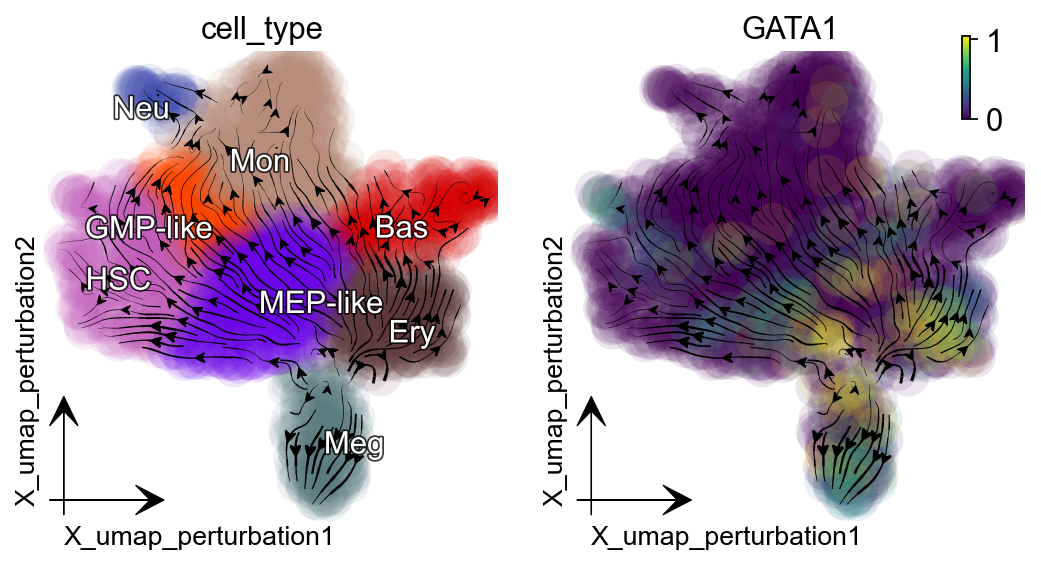

In [6]:
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], 
                       basis="umap_perturbation",figsize=(4,4),
                       s_kwargs_dict={'adjust_legend':True,'dpi':80}
                      )

Suppression of SPI1 diverts cells from MEP-related lineages to GMP-related lineages.

In [7]:
gene = "SPI1"
dyn.pd.perturbation(adata_labeling, gene, [-100], emb_basis="umap")

|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....
|-----> project the pca perturbation vector to low dimensional space....
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.6314s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> you can use dyn.pl.streamline_plot(adata, basis='umap_perturbation') to visualize the perturbation vector


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap_perturbation
|-----------> skip filtering cell_type by stack threshold when stacking color because it is not a numeric type
|-----------> plotting with basis key=X_umap_perturbation


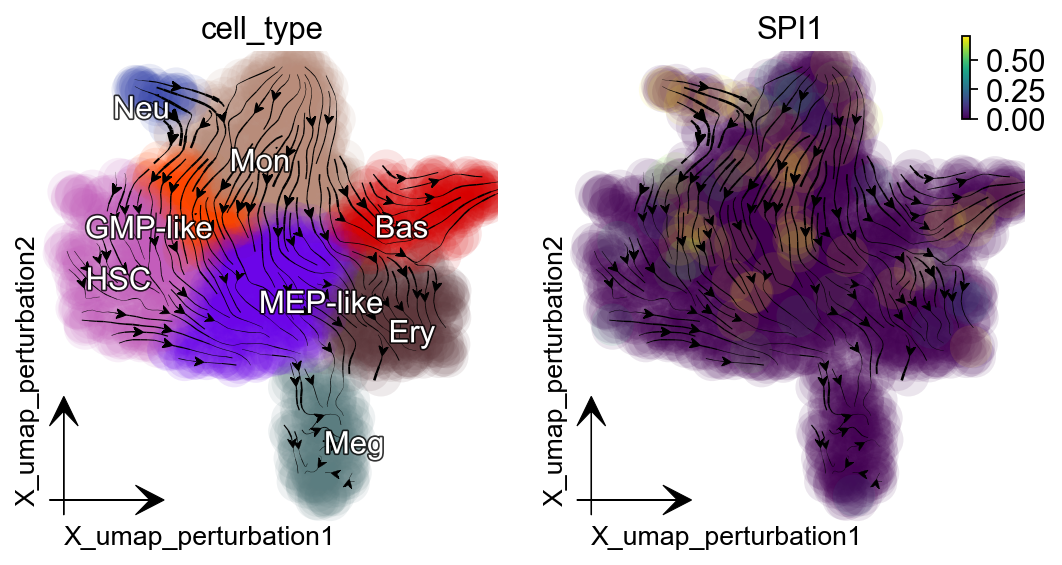

In [8]:
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], 
                       basis="umap_perturbation",figsize=(4,4),
                      s_kwargs_dict={'adjust_legend':True,'dpi':80})

### Supress SPI1/GATA at the same time  
 Suppression of both SPI1 and GATA1 traps cells in the progenitor states. This behavior is different from the cases in which we perturb SPI1 and GATA1 individually.

|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....
|-----> project the pca perturbation vector to low dimensional space....
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.5555s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> you can use dyn.pl.streamline_plot(adata, basis='umap_perturbation') to visualize the perturbation vector
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap_perturbation
|-----------> skip filtering cell_type by stack threshold when stacking color because it is not a numeric type
|-----------> plotting with basis key=X_umap_perturba

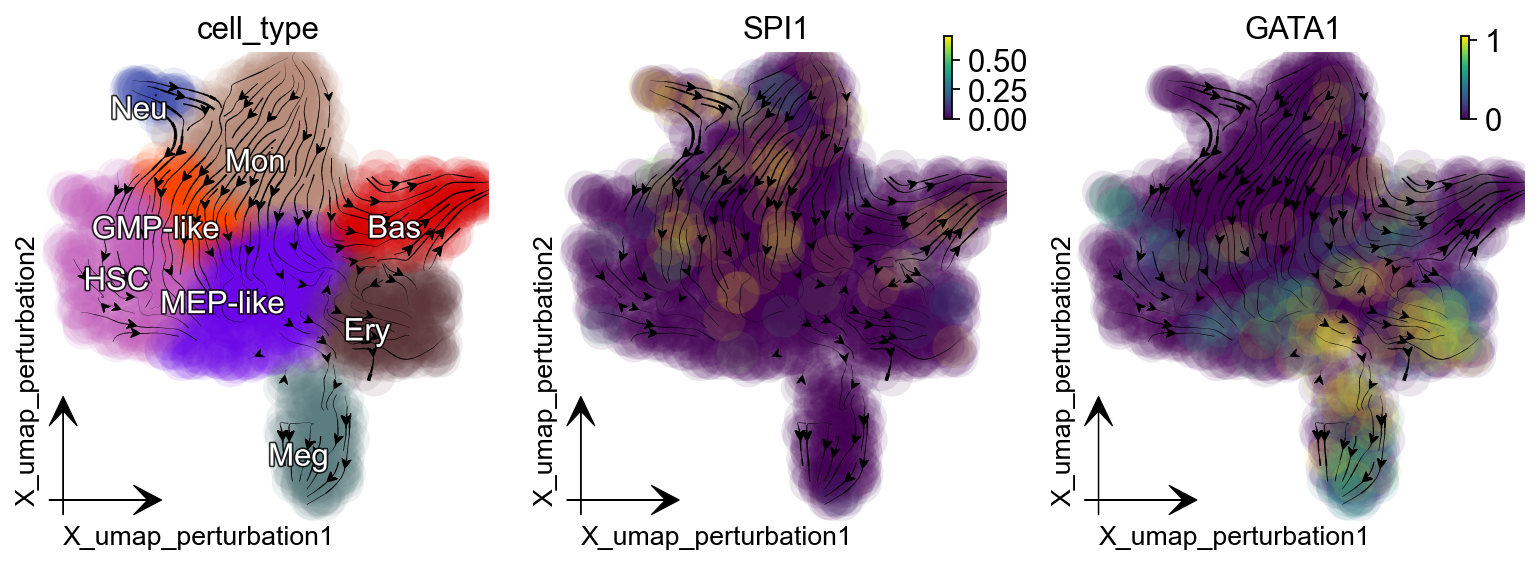

In [10]:
selected_genes =  [ "SPI1", "GATA1"]
# expr_vals = [-100, -100]
expr_vals = [-100, -15]
dyn.pd.perturbation(adata_labeling, selected_genes, expr_vals, emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type"] + selected_genes, 
                       basis="umap_perturbation",figsize=(4,4),
                      s_kwargs_dict={'adjust_legend':True,'dpi':80})


### Activate KLF1
{mod}`Dynamo` *in silico* perturbation can correctly predict other cellular transitions, showcased in :cite:p:`QIU2022`. Here is another example: activating KLF1 leads to conversion into erythroid cells, consistent with :cite:p:`Orkin2008-vp`.

|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....
|-----> project the pca perturbation vector to low dimensional space....
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.5419s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> you can use dyn.pl.streamline_plot(adata, basis='umap_perturbation') to visualize the perturbation vector
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap_perturbation
|-----------> skip filtering cell_type by stack threshold when stacking color because it is not a numeric type
|-----------> plotting with basis key=X_umap_perturba

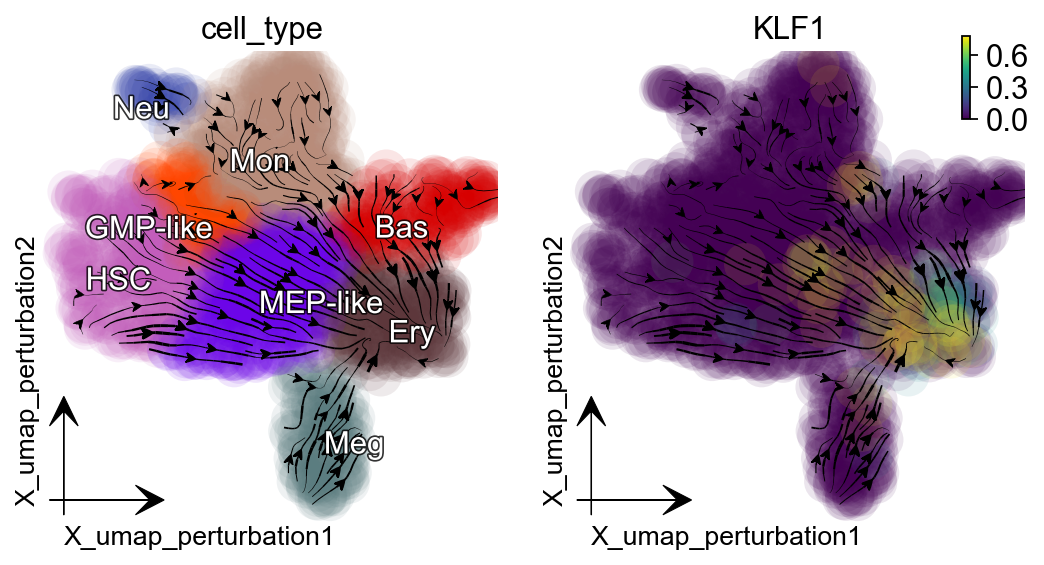

In [11]:
gene = "KLF1"
dyn.pd.perturbation(adata_labeling, gene, [100], emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], 
                       basis="umap_perturbation",figsize=(4,4),
                      s_kwargs_dict={'adjust_legend':True,'dpi':80})

### Promote erythroid lineage: triple activation
Triple activation of GATA1, KLF1, and TAL1, known erythrocyte factors, and TFs used for reprogramming fibroblasts into erythrocytes, diverts most other cells into the Ery lineage (Capellera-Garcia et al., 2016).

|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....
|-----> project the pca perturbation vector to low dimensional space....
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.5342s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> you can use dyn.pl.streamline_plot(adata, basis='umap_perturbation') to visualize the perturbation vector
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap_perturbation
|-----------> skip filtering cell_type by stack threshold when stacking color because it is not a numeric type
|-----------> plotting with basis key=X_umap_perturba

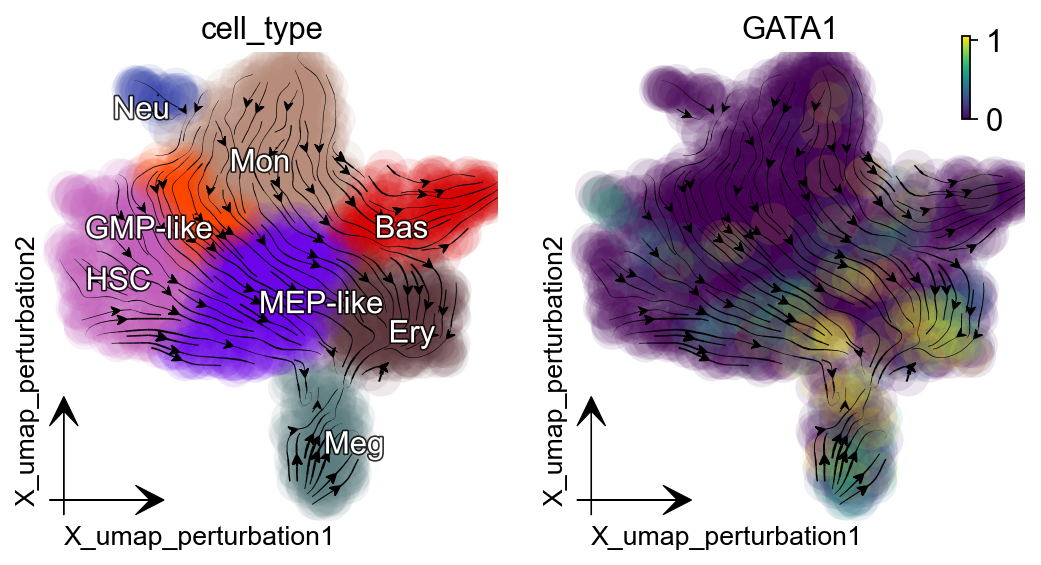

|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap_perturbation
|-----------> plotting with basis key=X_umap_perturbation


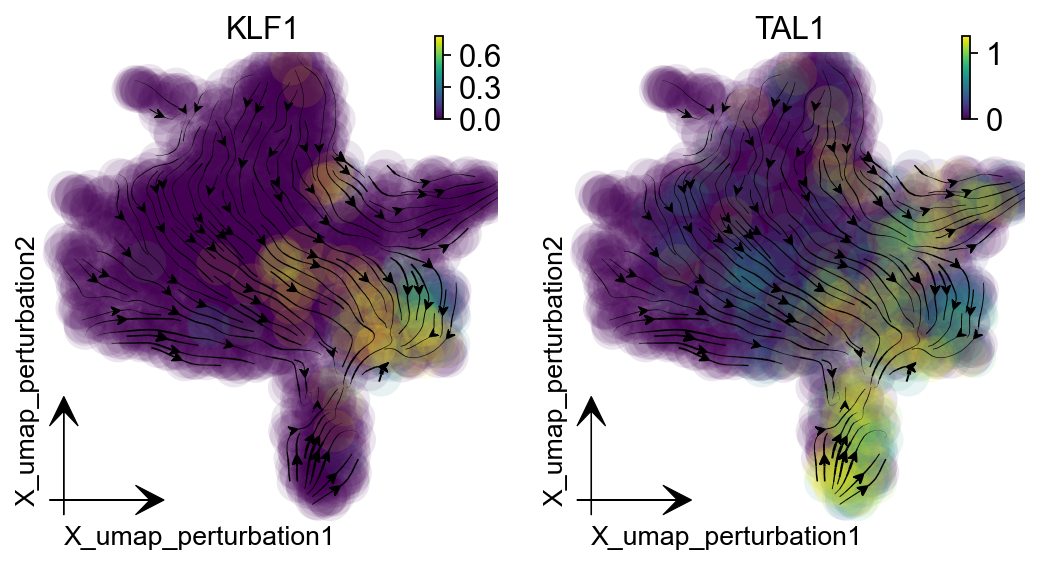

In [15]:
selected_genes =  ["GATA1", "KLF1", "TAL1"]
expr_vals = [100, 100, 100]
dyn.pd.perturbation(adata_labeling, selected_genes, expr_vals, emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type",selected_genes[0]], 
                       basis="umap_perturbation", figsize=(4, 4),
                      s_kwargs_dict={'adjust_legend':True,'dpi':80})
dyn.pl.streamline_plot(adata_labeling, color=selected_genes[1:], 
                       basis="umap_perturbation", figsize=(4, 4),
                      s_kwargs_dict={'adjust_legend':True,'dpi':80})